# 라이브러리 임포트
* 실습에 필요한 라이브러리를 임포트

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기(학습데이터, 테스트 데이터)
- 데이터 분석 단계에서 생성한 농구 포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드합니다

In [21]:
train = pd.read_csv('data/csv/basketball_train.csv')
test = pd.read_csv('data/csv/basketball_test.csv')

In [22]:
print(train.shape[0]) #학습용 데이터 셋의 수(행)
print(train.shape[1]) #feature의 수(열)

print(test.shape[0]) #검증용 데이터 셋의 수(행)
print(test.shape[1]) #feature의 수(열)

80
5
20
5


## 최적의 k 찾기
##### k의 값은 판단의 모호성을 줄이기 위해 홀수 값으로 지정.

In [27]:
# import KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k찾기, 3부터 시작해서 max_k_range /2 까지의 범위.
max_k_range = train.shape[0] #최대 데이터의 값을 저장
k_list = []

for i in range(3, max_k_range // 2, 2) : # 홀수 값만큼 건너뜀. #( 3, 5, 7.....39) 
    k_list.append(i) #값을 하나씩 넣어준다. 

print(k_list)
cross_validation_score = []
x_train = train[['3P','TRB','BLK']] 
#데이터 프레임의 접근 방법 1. [] 2. 판다스에서 제공하는 loc와 iloc
y_train = train[['Pos']] 

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


In [28]:
# 10-ford cross validation
for k in k_list : 
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),cv=10, scoring='accuracy')  
    # k값, x훈련 데이터 , y훈련 데이터(2차원의 y이 데이터를 펼쳐서 1차원으로), cv는 x번 교차검증 , scoring은 정확도로 결과를 도출해라.
    
    cross_validation_score.append(scores.mean()) # 평균값을 담아준다.

cross_validation_score

[0.8625,
 0.85,
 0.8875,
 0.9125,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.8375,
 0.825,
 0.8,
 0.8125,
 0.8,
 0.7875]

## 시각화

Text(0, 0.5, 'Accuracy')

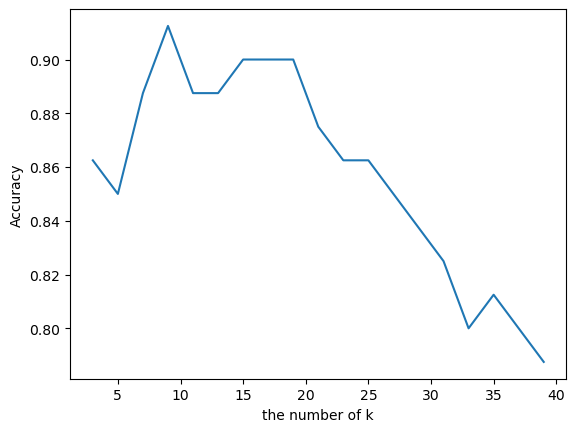

In [29]:
plt.plot(k_list, cross_validation_score)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')

### 최적의 k값

In [32]:
cvs = cross_validation_score
k = k_list[cvs.index(max(cross_validation_score))]
print("최적의 k 값 : " + str(k))

최적의 k 값 : 9


## 2개의 특징으로 예측하기('3P','BLK')

In [33]:
knn = KNeighborsClassifier(n_neighbors= k)

x_train = train[['3P','BLK']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK']]
y_test = test[['Pos']]

pred = knn.predict(x_test) # 예측! 

comparision = pd.DataFrame({'prediction' : pred, 'target': y_test.values.ravel()})
comparision

,prediction,target
0,C,C
1,C,C
2,C,C
3,C,C
4,C,C
5,SG,SG
6,SG,SG
7,C,C
8,SG,SG
9,SG,SG


In [34]:
from sklearn.metrics import accuracy_score

print('Accuracy : ', str(accuracy_score(y_test.values.ravel(), pred)))

Accuracy :  1.0


### 3개의 특징으로 예측하기('3P', 'BLK', 'TRB)

In [35]:
knn = KNeighborsClassifier(n_neighbors= k)

x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test) # 예측! 

comparision = pd.DataFrame({'prediction' : pred, 'target': y_test.values.ravel()})
print(comparision)
print('Accuracy : ', str(accuracy_score(y_test.values.ravel(), pred)))

   prediction target
0           C      C
1           C      C
2           C      C
3           C      C
4           C      C
5          SG     SG
6          SG     SG
7           C      C
8          SG     SG
9          SG     SG
10          C      C
11          C      C
12          C      C
13         SG     SG
14         SG     SG
15         SG     SG
16          C      C
17         SG     SG
18         SG     SG
19          C      C
Accuracy :  1.0
